In [88]:
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d.axes3d import get_test_data
from mpl_toolkits.mplot3d import Axes3D
from fenics import *
from mshr import *
import numpy as np
from dotenv import load_dotenv
from scipy.ndimage import zoom
from scipy.interpolate import interp1d
import os
from IPython.display import display, Math
# Cargar las variables del archivo .env
load_dotenv()

True

In [4]:
nueva_ruta ='/media/erick/TOSHIBA EXT/resultados_new_mu_1_weak'

In [5]:
# Define time parameters
T = float(os.getenv('T'))
dt = float(os.getenv('dt'))
nb = int(os.getenv('nb'))
save_images = os.getenv('SAVE_IMAGES')

# Define time parameters
T = float(os.getenv('T'))
dt = float(os.getenv('dt'))
nb = int(os.getenv('nb'))

os.chdir(nueva_ruta)

In [188]:
def power_spectrum(field_type, t, block):
    """
    Calcula el espectro de potencia 2D para un campo dado y guarda el resultado,
    incluyendo la componente de frecuencia cero (DC).

    Args:
        field_type (str): Tipo de campo (por ejemplo, 'c', 's', 'i').
        t (float): Paso de tiempo.
        block (int): Bloque actual.

    Returns:
        tuple: Nombre del archivo del campo original y del espectro de Fourier generado.
    """
    # Construcción del nombre del archivo del campo
    field_file = f"matrix_{field_type}_{t:.3f}_nb_{block}.txt"

    # Manejo de errores al cargar el archivo
    try:
        field = np.loadtxt(field_file, float)
    except Exception as e:
        print(f"Error al cargar el archivo {field_file}: {e}")
        return None, None

    # Transformada de Fourier 2D
    try:
        fft_field = np.fft.fft2(field)       # Transformada de Fourier
        fft_field = np.fft.fftshift(fft_field)  # Reordenamiento de frecuencias
        fft_field = np.abs(fft_field)       # Magnitud del espectro
    except Exception as e:
        print(f"Error al calcular la transformada de Fourier: {e}")
        return None, None

    # Guardar el espectro de Fourier en un archivo
    dft_file = f"matrix_{field_type}_dft_{t:.3f}_nb_{block}.txt"
    try:
        np.savetxt(dft_file, fft_field, delimiter="\t")
    except Exception as e:
        print(f"Error al guardar el archivo {dft_file}: {e}")
        return field_file, None

    # Retornar los nombres de los archivos generados
    return field_file, dft_file

In [101]:
def plot_fft(dft_field_c, dft_field_s, dft_field_i, t, save_images, block): 
    """
    Genera gráficos de los espectros de Fourier para los campos `c`, `s`, e `i` y guarda las imágenes opcionalmente.

    Args:
        dft_field_c (str): Archivo del espectro de Fourier del campo `c`.
        dft_field_s (str): Archivo del espectro de Fourier del campo `s`.
        dft_field_i (str): Archivo del espectro de Fourier del campo `i`.
        t (float): Paso de tiempo.
        save_images (str): 'Y' si se deben guardar las imágenes, de lo contrario, se mostrarán.
        block (int): Número del bloque actual.

    Returns:
        None
    """
    # Cargar los datos de los espectros desde los archivos
    try:
        dft_field_c = np.loadtxt(dft_field_c, float)
        dft_field_s = np.loadtxt(dft_field_s, float)
        dft_field_i = np.loadtxt(dft_field_i, float)
    except Exception as e:
        print(f"Error al cargar los archivos: {e}")
        return

    # Configurar el tamaño del gráfico
    plt.figure(figsize=(15, 8))

    # Gráfico del campo `c`
    plt.subplot(1, 3, 1)
    img1 = plt.imshow(dft_field_c, cmap='seismic', interpolation='bilinear', extent=[0, 250, 0, 250])
    plt.gca().invert_yaxis()  # Invertir el eje Y
    plt.title(r"$\mathcal{P}(c)(t=" + f"{t:.3f}" + r")$")
    plt.colorbar(img1, fraction=0.046, pad=0.04)

    # Gráfico del campo `s`
    plt.subplot(1, 3, 2)
    img2 = plt.imshow(dft_field_s, cmap='seismic', interpolation='bilinear', extent=[0, 250, 0, 250])
    plt.gca().invert_yaxis()  # Invertir el eje Y
    plt.title(r"$\mathcal{P}(s)(t=" + f"{t:.3f}" + r")$")
    plt.colorbar(img2, fraction=0.046, pad=0.04)

    # Gráfico del campo `i`
    plt.subplot(1, 3, 3)
    img3 = plt.imshow(dft_field_i, cmap='seismic', interpolation='bilinear', extent=[0, 250, 0, 250])
    plt.gca().invert_yaxis()  # Invertir el eje Y
    plt.title(r"$\mathcal{P}(i)(t=" + f"{t:.3f}" + r")$")
    plt.colorbar(img3, fraction=0.046, pad=0.04)

    # Guardar o mostrar los gráficos según `save_images`
    if save_images.upper() == 'Y':
        filename = f'FFT_block_{block}_step_{t:.3f}.png'
        plt.savefig(filename, dpi=300, bbox_inches='tight')
        plt.show()
    else:
        plt.show()

    # Limpiar la figura después de graficar para evitar conflictos
    plt.close()

In [ ]:
for block in range(1,nb+1):
    t = 0
    print("block=", block)  
    while t <= T:
        t += dt
        field_c, dft_field_c = power_spectrum('c', t, block)
        field_s, dft_field_s = power_spectrum('s', t, block)
        field_i, dft_field_i = power_spectrum('i', t, block)     
        plot_fft(dft_field_c, dft_field_s, dft_field_i, t, save_images, block)

$
\textbf{Cálculo paso a paso de la correlación:}
$

1. $\textbf{Calcular el espectro de Fourier:}$
   $
   S_1(\mathbf{k}) = \mathcal{F}[s_1(\mathbf{x})], \quad S_2(\mathbf{k}) = \mathcal{F}[s_2(\mathbf{x})].
   $

2. $\textbf{Producto en el dominio de Fourier:}$
   $
   C_{\mathbf{k}} = S_1(\mathbf{k}) S_2^*(\mathbf{k}).
   $

3. $\textbf{Transformada inversa:}$
   $
   C_{s_1, s_2}(\mathbf{x}) = \mathcal{F}^{-1}[C_{\mathbf{k}}].
   $

4. $\textbf{Normalización:}$
   - Calcular las desviaciones estándar \(\sigma_{s_1}\) y \(\sigma_{s_2}\) a partir de las señales originales:
     $
     \sigma_{s_1} = \sqrt{\langle s_1^2 \rangle - \langle s_1 \rangle^2}, \quad 
     \sigma_{s_2} = \sqrt{\langle s_2^2 \rangle - \langle s_2 \rangle^2}.
     $
   - Dividir la correlación obtenida por el producto \(\sigma_{s_1} \sigma_{s_2}\):
     $
     C_{\text{norm}}(\mathbf{x}) = \frac{C_{s_1, s_2}(\mathbf{x})}{\sigma_{s_1} \sigma_{s_2}}.
     $

In [156]:
def calculate_correlation(spectrum1, spectrum2=None, output_prefix="correlation", normalize=True):
    """
    Calcula la correlación cruzada o autocorrelación normalizada a partir de los espectros de potencia.

    Args:
        spectrum1 (str o np.array): Archivo del primer espectro de potencia o matriz ya cargada.
        spectrum2 (str o np.array, optional): Archivo del segundo espectro de potencia o matriz ya cargada.
                                              Si no se especifica, se calcula la autocorrelación.
        output_prefix (str): Prefijo para los archivos de salida.
        normalize (bool): Si True, normaliza la correlación usando las desviaciones estándar.

    Returns:
        str: Nombre del archivo de la correlación calculada.
    """
    # Verificar si spectrum1 es un archivo o una matriz
    if isinstance(spectrum1, str):
        spectrum1 = np.loadtxt(spectrum1, float)

    # Verificar si spectrum2 es un archivo o una matriz
    if spectrum2 is None:
        spectrum2 = spectrum1  # Autocorrelación
        correlation_type = "autocorrelation"
    else:
        if isinstance(spectrum2, str):
            spectrum2 = np.loadtxt(spectrum2, float)
        correlation_type = "crosscorrelation"

    # Producto en el dominio de Fourier
    correlation_fft = spectrum1 * spectrum2  # Producto directo
    correlation = np.fft.ifft2(correlation_fft).real  # Transformada inversa para regresar al dominio espacial

    # Normalización usando las desviaciones estándar
    if normalize:
        # Calcular las desviaciones estándar de las señales originales
        sigma_s1 = np.sqrt((spectrum1**2).mean() - spectrum1.mean()**2)
        sigma_s2 = np.sqrt((spectrum2**2).mean() - spectrum2.mean()**2)

        # Normalizar usando sigma_s1 y sigma_s2
        if sigma_s1 != 0 and sigma_s2 != 0:
            correlation /= (sigma_s1 * sigma_s2)
        else:
            raise ValueError("Una o ambas desviaciones estándar son cero. No se puede normalizar.")

    # Guardar la correlación en un archivo
    correlation_file = f"{output_prefix}_{correlation_type}.txt"
    np.savetxt(correlation_file, correlation, delimiter="\t")
    print(f"{correlation_type.capitalize()} guardada en: {correlation_file}")



In [158]:
def calculate_radial_average(correlation):
    """
    Calcula el promedio radial de una matriz de correlación.

    Args:
        correlation (np.array): Matriz de correlación.

    Returns:
        r_values (np.array): Distancias radiales.
        radial_avg (np.array): Valores promedio a cada radio.
    """
    # Dimensiones de la matriz y centro
    n = correlation.shape[0]
    center = n // 2

    # Crear una matriz de coordenadas radiales
    y, x = np.ogrid[:n, :n]
    r = np.sqrt((x - center)**2 + (y - center)**2)

    # Discretizar los radios
    r = r.astype(np.int)

    # Calcular el promedio radial
    radial_avg = np.zeros(r.max() + 1)
    for radius in range(r.max() + 1):
        mask = r == radius
        radial_avg[radius] = correlation[mask].mean()

    r_values = np.arange(len(radial_avg))  # Valores de radio
    return r_values, radial_avg

In [182]:
field1 = np.loadtxt("matrix_c_dft_0.015_nb_1.txt", float)
field2 = np.loadtxt("matrix_s_dft_0.015_nb_1.txt", float)

In [183]:
calculate_correlation(field1, field2)

Crosscorrelation guardada en: correlation_crosscorrelation.txt


In [184]:
calculate_correlation(field1)

Autocorrelation guardada en: correlation_autocorrelation.txt


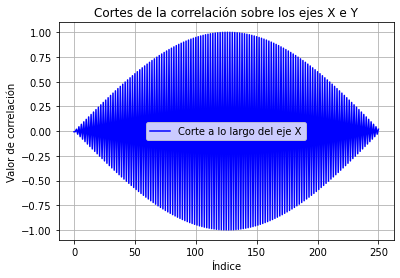

In [185]:
correlation = np.loadtxt("correlation_autocorrelation.txt", float)

# Obtener la forma de la matriz y su centro
n = correlation.shape[0]
center = n // 2

# Extraer cortes a lo largo de los ejes
correlation_x = correlation[center, :]  # Corte a lo largo del eje X
correlation_y = correlation[:, center]  # Corte a lo largo del eje Y

# Corte a lo largo del eje X
plt.plot(correlation_x, label="Corte a lo largo del eje X", color='blue')

# Configuración del gráfico
plt.title("Cortes de la correlación sobre los ejes X e Y")
plt.xlabel("Índice")
plt.ylabel("Valor de correlación")
plt.legend()
plt.grid()
plt.show()

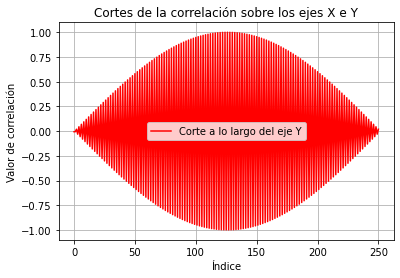

In [186]:
# Corte a lo largo del eje Y
plt.plot(correlation_y, label="Corte a lo largo del eje Y", color='red')

# Configuración del gráfico
plt.title("Cortes de la correlación sobre los ejes X e Y")
plt.xlabel("Índice")
plt.ylabel("Valor de correlación")
plt.legend()
plt.grid()
plt.show()

/tmp/ipykernel_17653/3623923361.py:21: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  r = r.astype(np.int)


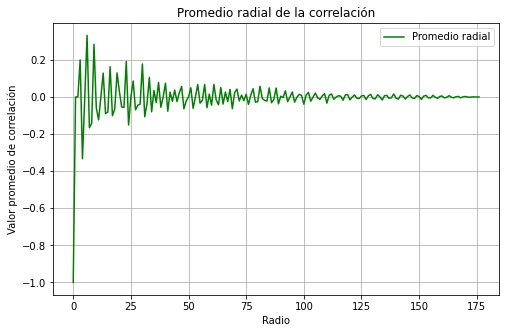

In [187]:
# Calcular el promedio radial
r_values, radial_avg = calculate_radial_average(correlation)

# Graficar el promedio radial
plt.figure(figsize=(8, 5))
plt.plot(r_values, radial_avg, label="Promedio radial", color='green')
plt.title("Promedio radial de la correlación")
plt.xlabel("Radio")
plt.ylabel("Valor promedio de correlación")
plt.grid()
plt.legend()
plt.show()